In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.optimize import curve_fit
import os

In [4]:
eta_base = scipy.io.loadmat('eta_base.mat')['eta_save']
eta_base.shape

(7, 4000)

In [5]:
eta_comps = []

for file in os.listdir('eta_perturbed'):
    eta_comps.append(scipy.io.loadmat(f'eta_perturbed/{file}')['eta_save'])

f'{len(eta_comps)} perturbed trajectories loaded'

'10 perturbed trajectories loaded'

Finding $|d|$ time series


In [6]:
ds = []
for eta_comp in eta_comps:
    d = []
    for t in range(eta_comp.shape[1]):
        d_j = 0
        for j in range(6):
            d_j += np.abs(eta_comp[j+1][t] - eta_base[j+1][t])
        d.append(d_j)

    d = np.array(d)
    ds.append(d)
len(ds)

10

In [7]:
times = scipy.io.loadmat('eta_base.mat')['t_save'][0]
times.shape

(4000,)

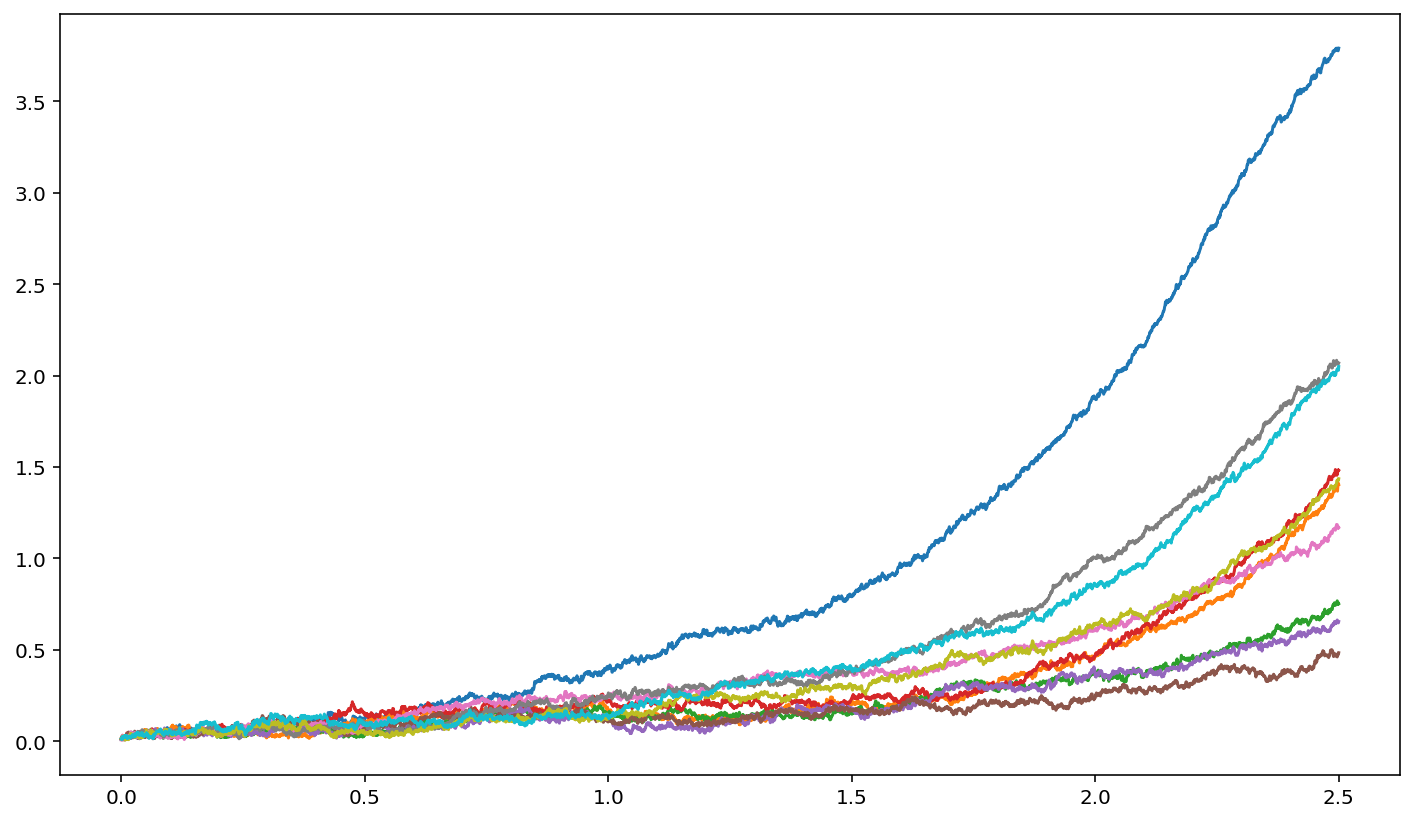

In [8]:
for d in ds:
    plt.plot(times, d)

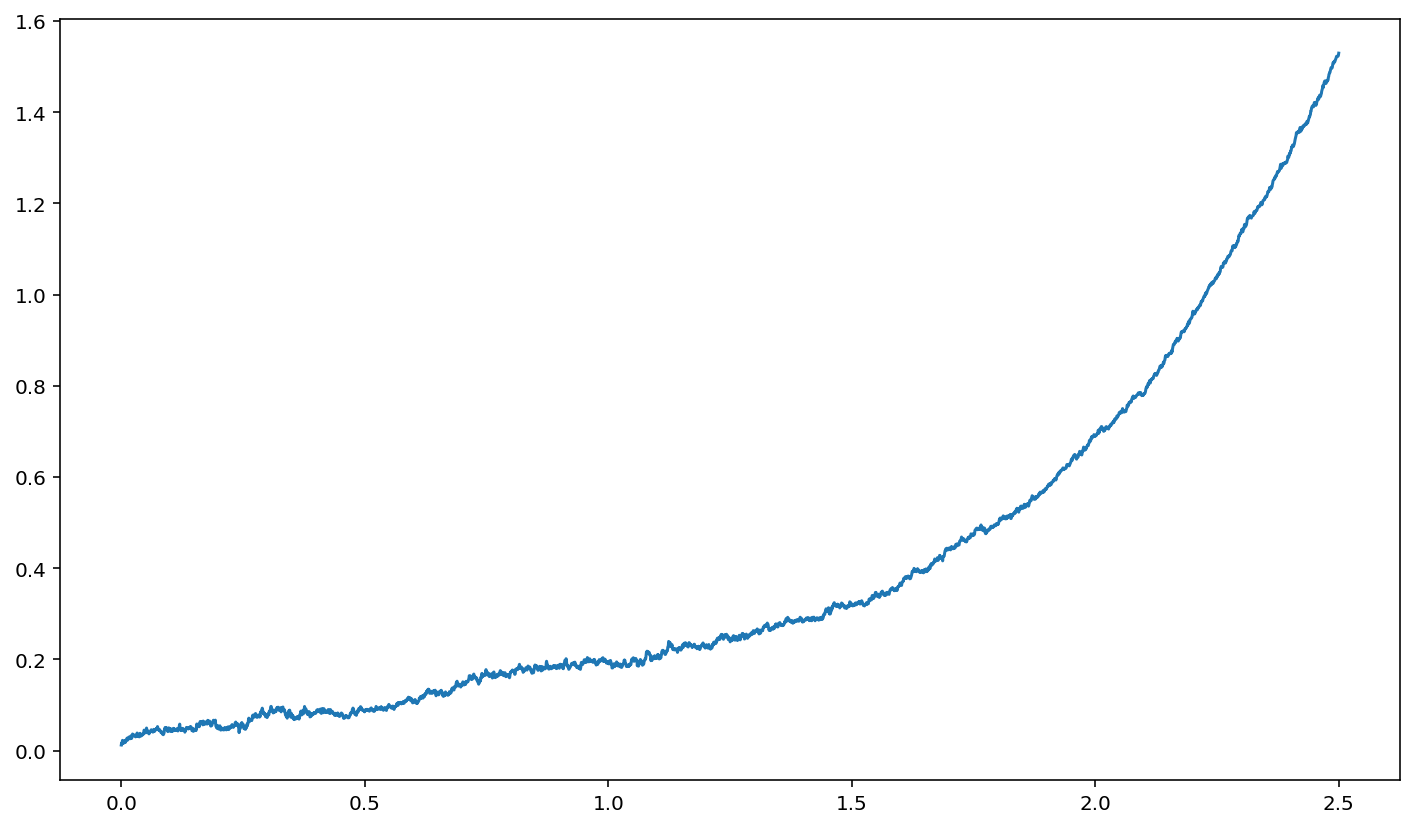

In [9]:
d_average = []
for t in range(eta_comp.shape[1]):
    d_average.append(np.average(np.array(ds)[:,t]))
d_average = np.array(d_average)
plt.plot(times, d_average)

## Curve Fitting



In [10]:
def f(t,k):
    return d_average[0]*np.exp(k*t)

In [11]:
lower_bounds = np.linspace(0, 1000, 10)
upper_bounds = np.linspace(3000,4000,10)

best_lower_bound = 0
best_upper_bound= 4000
best_bounds_r_squared = 0

for lower_bound in lower_bounds:
    for upper_bound in upper_bounds:
        
        lower_bound = int(lower_bound)
        upper_bound = int(upper_bound)
        
        if upper_bound > lower_bound:
            d_average_truncated = np.copy(d_average)[lower_bound:upper_bound]
            times_truncated = np.copy(times)[lower_bound:upper_bound]
            
            popt, pcov = curve_fit(lambda t, b: d_average_truncated[0] * np.exp(b * t),  times_truncated, d_average_truncated)

            residuals = np.sum((d_average_truncated - f(times_truncated, popt[0]))**2)

            sum_squares = np.sum((d_average_truncated - np.mean(d_average_truncated))**2)

            r_squared = 1 - (residuals / sum_squares)
            
            print(popt[0], r_squared)

            if 1-r_squared < 1-best_bounds_r_squared:
                best_bounds_r_squared = r_squared
                best_lower_bound = lower_bound
                best_upper_bound = upper_bound
                
                
        
d_average = d_average[best_lower_bound : best_upper_bound]
times = times[best_lower_bound : best_upper_bound]

2.1131303155759267 0.767994732414988
2.0860727762630025 0.8038654973061925
2.064463774770023 0.8391744663800513
2.0437056492084777 0.8658961413534476
2.0246447005457546 0.8876089424931258
2.0099875597886876 0.9088990220058499
1.9978403702084306 0.9270251318871829
1.9861615224086222 0.940639504687968
1.9741340908736935 0.9503294623111048
1.9618836891718936 0.957354310277878
1.3488133299413494 -0.8935470442198352
1.3500058287813312 -0.769612319783572
1.3545279471266651 -0.6466760211021729
1.3584665315882372 -0.544915350180166
1.3626054296181156 -0.4565282481282198
1.3695030551999137 -0.36976321989916694
1.3776309934268098 -0.2913235570749122
1.3852198554213258 -0.22579205232571864
1.3915253888091452 -0.1724829301393762
1.3968251849063935 -0.1278644784531182
1.2849695249323303 -1.1651174175414245
1.2886216093730278 -1.0122084188925502
1.2954193938170415 -0.862517551435128
1.3015019764585258 -0.7397056435573923
1.3076513522149482 -0.633873439800722
1.3164175667356375 -0.5309144912275909
1.

0.6659762258146872 -4.668726814320266
0.6933849027860466 -3.942103888157175
0.7224129942065287 -3.3115592078562903
0.749598129027824 -2.8429245460387995
0.7756654890030675 -2.4694858639423236
0.8030710749856752 -2.131318081032981
0.8305383321435079 -1.8464918089086133
0.8564850928524257 -1.6218378394377249
0.8802167655570903 -1.4468307299893977
0.9021592320525947 -1.305050921005305


In [12]:
popt, pcov = curve_fit(lambda t, b: np.copy(d_average)[best_lower_bound:best_upper_bound][0] * np.exp(b * t), np.copy(times)[best_lower_bound:best_upper_bound], np.copy(d_average)[best_lower_bound:best_upper_bound])
print(popt, pcov)

[1.96188369] [[1.03379567e-06]]


In [13]:
# Residuals
residuals = np.sum((d_average - f(times,popt[0]))**2)

sum_squares = np.sum((d_average-np.mean(d_average))**2)

r_squared = 1 - (residuals / sum_squares)

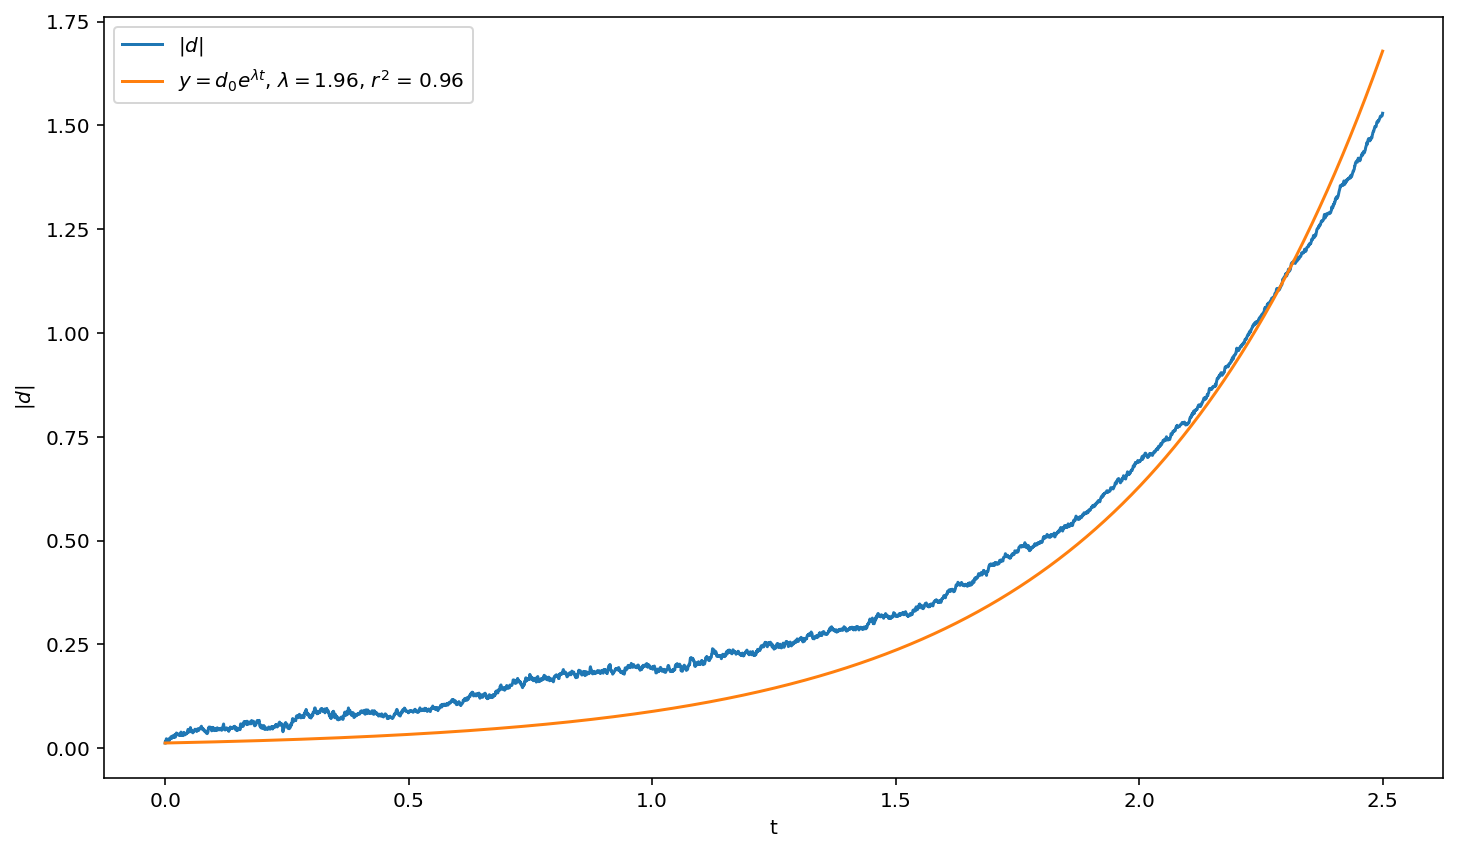

In [14]:
plt.figure()
plt.plot(times, d_average)
plt.plot(times, f(times, popt[0]))
plt.xlabel('t')
plt.ylabel('$|d|$')
plt.legend(['$|d|$', '$y = d_0 e^{\lambda t}$, $\lambda = $' + str(np.round(popt[0], 2)) + ', $r^2$ = ' + str(np.round(r_squared,2))])

In [15]:
residuals

24.29461601747742